# Tree-2Outcomes-ClustCentUnder

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file = "CleanData.csv"
results_df = pd.read_csv(file)
results_df

,res_state,age_group,sex,race,symptom_status,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,severe
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,Yes,mild
2,IA,0 - 17 years,Male,White,Symptomatic,Yes,mild
3,KS,18 to 49 years,Female,White,Symptomatic,Yes,mild
4,OH,18 to 49 years,Male,White,Symptomatic,Yes,mild
...,...,...,...,...,...,...,...
6175,KS,18 to 49 years,Female,White,Symptomatic,No,mild
6176,OH,50 to 64 years,Female,White,Symptomatic,Yes,mild
6177,OH,0 - 17 years,Female,Black,Symptomatic,Yes,mild
6178,WY,18 to 49 years,Male,White,Symptomatic,Yes,mild


In [3]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
mild = results_df['outcome']=='mild'
mild = results_df[results_df['outcome']=='mild']
mild = mild['outcome'].count()

severe = results_df['outcome']=='severe'
severe = results_df[results_df['outcome']=='severe']
severe = severe['outcome'].count()

outcome = {"Mild": mild, "Severe": severe}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['Mild', 'Severe']
[5604, 576]


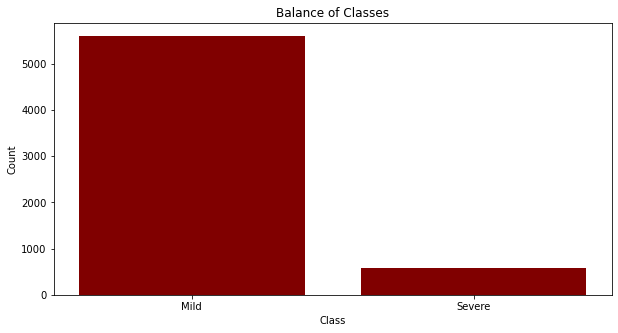

In [4]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [5]:
# Encode with "get_dummies"
part_encoded_df = results_df.copy()
part_encoded_df = pd.get_dummies(part_encoded_df, columns=['res_state', 'age_group', 'sex', 'race', 'symptom_status',
                                                           'underlying_conditions_yn'])


# Encode "outcome"
le=LabelEncoder()
part_encoded_df['outcome'] = le.fit_transform(part_encoded_df['outcome'])
results_encoded_df = part_encoded_df.copy()
results_encoded_df

,outcome,res_state_CO,res_state_IA,res_state_ID,res_state_KS,res_state_KY,res_state_LA,res_state_MN,res_state_NC,res_state_NJ,...,sex_Male,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_White,symptom_status_Asymptomatic,symptom_status_Symptomatic,underlying_conditions_yn_No,underlying_conditions_yn_Yes
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
6177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
6178,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [6]:
outcome_encode = results_df[['outcome']].copy()
outcome_encode['outcome_encode'] = le.fit_transform(results_df['outcome'].values)
outcome_encode = outcome_encode.drop_duplicates('outcome')

#results_encoded_df
outcome_encode

,outcome,outcome_encode
0,severe,1
1,mild,0


In [7]:
results_encoded_df

,outcome,res_state_CO,res_state_IA,res_state_ID,res_state_KS,res_state_KY,res_state_LA,res_state_MN,res_state_NC,res_state_NJ,...,sex_Male,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_White,symptom_status_Asymptomatic,symptom_status_Symptomatic,underlying_conditions_yn_No,underlying_conditions_yn_Yes
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
6177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
6178,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [8]:
X = results_encoded_df.copy()
X = X.drop("outcome", axis=1)
X

,res_state_CO,res_state_IA,res_state_ID,res_state_KS,res_state_KY,res_state_LA,res_state_MN,res_state_NC,res_state_NJ,res_state_NV,...,sex_Male,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_White,symptom_status_Asymptomatic,symptom_status_Symptomatic,underlying_conditions_yn_No,underlying_conditions_yn_Yes
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
6177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
6178,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [9]:
y = results_encoded_df["outcome"].values
y

array([1, 0, 0, ..., 0, 0, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4635, 32)
(1545, 32)
(4635,)
(1545,)


In [11]:
from collections import Counter
Counter(y_train)

Counter({1: 435, 0: 4200})

In [12]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1111)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

C:\Users\lkwor\anaconda3\envs\mlenv\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (158) found smaller than n_clusters (435). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


In [13]:
Counter(y_resampled)

Counter({0: 435, 1: 435})

# Decision Tree Model

In [14]:
# Decision Tree Model
model=tree.DecisionTreeClassifier()
model=model.fit(X_resampled, y_resampled)

predictions=model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Mild", "Actual Severe"],
    columns=["Predicted Mild", "Predicted Severe"])
cm_df

,Predicted Mild,Predicted Severe
Actual Mild,482,922
Actual Severe,26,115


In [15]:
from sklearn.metrics import balanced_accuracy_score
bal_acc_score=accuracy_score(y_test, predictions)
bal_acc_score

0.3864077669902913

In [16]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.34      0.82      0.50      0.53      0.27      1404
          1       0.11      0.82      0.34      0.20      0.53      0.29       141

avg / total       0.87      0.39      0.77      0.48      0.53      0.27      1545

